In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task 5

In [11]:
img4 = cv2.imread('images\image4.jpg')      # read image4
img2 = cv2.imread('images\image2.jpg')      # read image2

img4      = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img2      = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img4_grey = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
img2_grey = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [12]:
def sobel_filter(img):
    '''apply the two sobel kernels to the image and do the convolution

        Args:
            img (np.array): orignal image

        Returns:
            np.array: derivative image
    '''
    # sobel x kernel
    Mx = np.array([[1.0, 0.0, -1.0],
                   [2.0, 0.0, -2.0],
                   [1.0, 0.0, -1.0]]) 
    # sobel y kernel
    My = np.array([[ 1.0,  2.0,  1.0],
                   [ 0.0,  0.0,  0.0],
                   [-1.0, -2.0, -1.0]])
    
    rs, cs = img.shape
    
    filtered_img = np.zeros((rs, cs))
    
    for x in range(1 , rs - 1):
        for y in range(1, cs - 1):
            Gx = np.sum(Mx * img[x - 1 : x + 2, y - 1 : y + 2])  # x direction
            Gy = np.sum(My * img[x - 1 : x + 2, y - 1 : y + 2])  # x direction
            # calculate the magnitude
            filtered_img[x][y] = np.sqrt(Gx ** 2 + Gy ** 2)
    return filtered_img

In [13]:
filtered_img2 = sobel_filter(img2_grey) # apply the sobel
filtered_img4 = sobel_filter(img4_grey) # apply the sobel

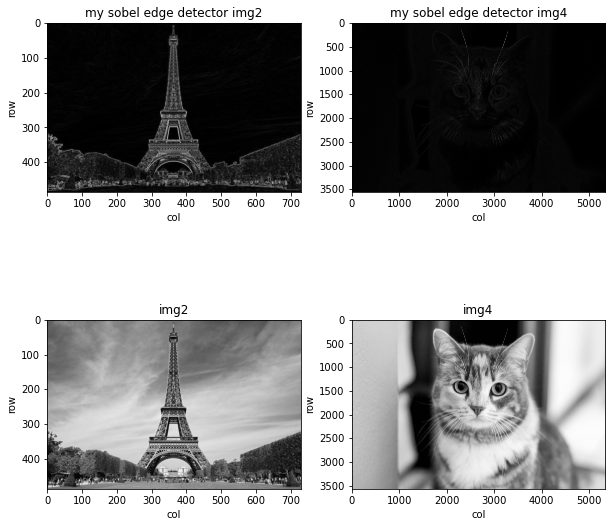

In [19]:
fig_1 = plt.figure(figsize=(10, 10))
myflt_2_plot = fig_1.add_subplot(2, 2, 1)
myflt_4_plot = fig_1.add_subplot(2, 2, 2)
ori_2_plot   = fig_1.add_subplot(2, 2, 3)
ori_4_plot   = fig_1.add_subplot(2, 2, 4)

myflt_2_plot.set_title("my sobel edge detector img2")
myflt_4_plot.set_title("my sobel edge detector img4")

myflt_2_plot.set_xlabel('col')
myflt_2_plot.set_ylabel('row')

myflt_4_plot.set_xlabel('col')
myflt_4_plot.set_ylabel('row')

myflt_2_plot.imshow(filtered_img2, cmap = plt.cm.gray)
myflt_4_plot.imshow(filtered_img4, cmap = plt.cm.gray)

ori_2_plot.set_title("img2")
ori_4_plot.set_title("img4")

ori_2_plot.set_xlabel('col')
ori_2_plot.set_ylabel('row')

ori_4_plot.set_xlabel('col')
ori_4_plot.set_ylabel('row')

ori_2_plot.imshow(img2_grey, cmap = plt.cm.gray)
ori_4_plot.imshow(img4_grey, cmap = plt.cm.gray)

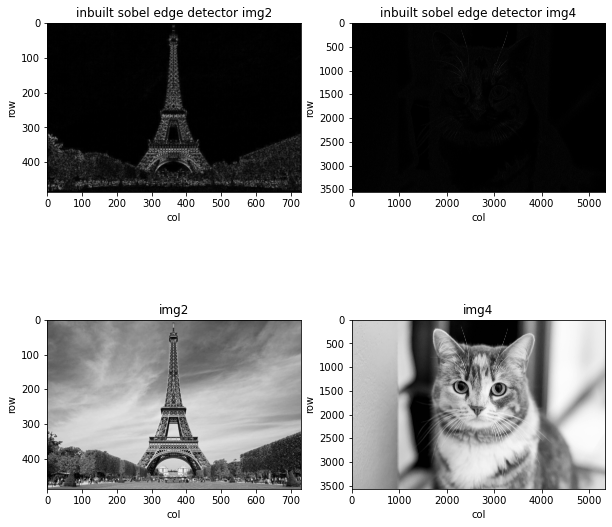

In [18]:
# the inbuilt sobel fucntion
sobel_img2 = cv2.Sobel(src=img2_grey, ddepth=cv2.CV_16S, dx=1, dy=1, ksize=3) 
sobel_img2 = cv2.convertScaleAbs(sobel_img2) # convert to uint8
# the inbuilt sobel fucntion
sobel_img4 = cv2.Sobel(src=img4_grey, ddepth=cv2.CV_16S, dx=1, dy=1, ksize=3)
sobel_img4 = cv2.convertScaleAbs(sobel_img4) # convert to uint8

fig_2        = plt.figure(figsize=(10, 10))
BIflt_2_plot = fig_2.add_subplot(2, 2, 1)
BIflt_4_plot = fig_2.add_subplot(2, 2, 2)
ori_2_plot   = fig_2.add_subplot(2, 2, 3)
ori_4_plot   = fig_2.add_subplot(2, 2, 4)

BIflt_2_plot.set_title("inbuilt sobel edge detector img2")
BIflt_4_plot.set_title("inbuilt sobel edge detector img4")

BIflt_2_plot.set_xlabel('col')
BIflt_2_plot.set_ylabel('row')

BIflt_4_plot.set_xlabel('col')
BIflt_4_plot.set_ylabel('row')

BIflt_2_plot.imshow(sobel_img2, cmap = plt.cm.gray)
BIflt_4_plot.imshow(sobel_img4, cmap = plt.cm.gray)

ori_2_plot.set_title("img2")
ori_4_plot.set_title("img4")

ori_2_plot.set_xlabel('col')
ori_2_plot.set_ylabel('row')

ori_4_plot.set_xlabel('col')
ori_4_plot.set_ylabel('row')

ori_2_plot.imshow(img2_grey, cmap = plt.cm.gray)
ori_4_plot.imshow(img4_grey, cmap = plt.cm.gray)

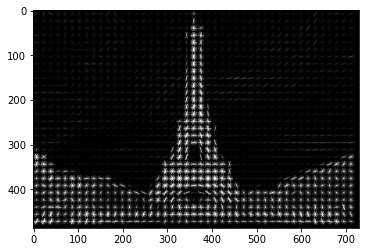

In [16]:
# HOG
sobel_img2x = cv2.Sobel(src=img2_grey, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_img2y = cv2.Sobel(src=img2_grey, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=1)

mag, angle = cv2.cartToPolar(sobel_img2x, sobel_img2y, angleInDegrees=True)

sobel_img4x = cv2.Sobel(src=img4_grey, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=3)
sobel_img4y = cv2.Sobel(src=img4_grey, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=3)

from skimage import feature, exposure

fd, hog_image = feature.hog(img2_grey, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap = plt.cm.gray)